In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
outpath='HAT-264-0000173.rlc.tfalc'
data=Table.read(outpath,format='ascii')
t=data['col2']
mag=data['col8']

Text(0.5, 0, 'time (BJD-2454833)')

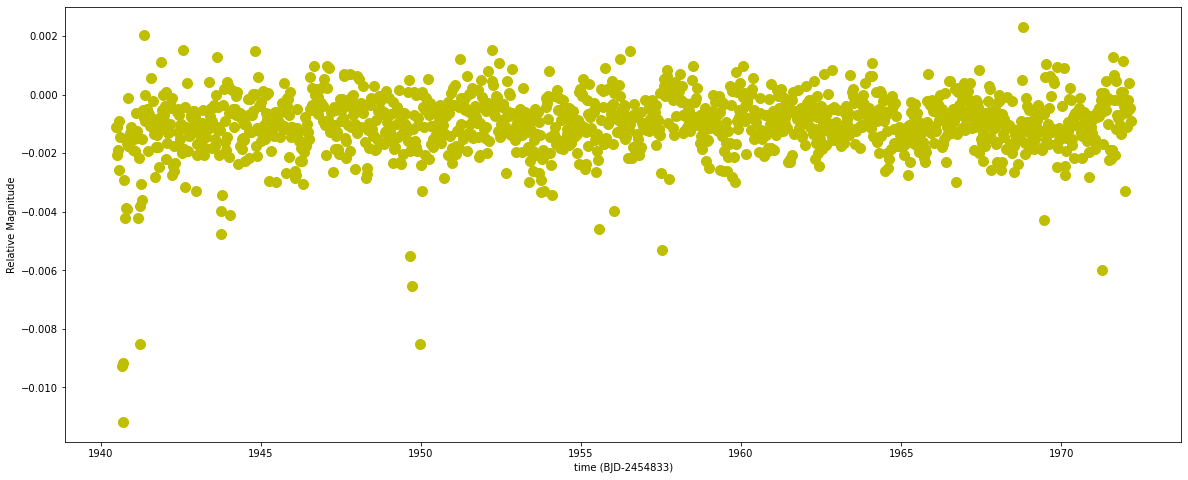

In [3]:
plt.figure(figsize=(20,8))
plt.plot(t,mag,'yo',markersize=10,label='HAT-264-0000173')
plt.ylabel('Relative Magnitude')
plt.xlabel('time (BJD-2454833)')

In [4]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200815 13:20:53 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200815 13:20:53 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


In [5]:
dates=data['col2']
fluxes=data['col8']
errs=fluxes*0.01

In [6]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs)

[I 200815 13:20:58 zgls:597] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200815 13:20:58 zgls:607] using 6 workers...


In [7]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs)

[I 200815 13:21:02 nonphysical:216] spline fit done. nknots = 13,  chisq = 12989194.23596, reduced chisq = 9628.75777
[I 200815 13:21:02 png:696] plotting phased LC with period 0.512776, epoch 1943.37891
[I 200815 13:21:02 nonphysical:216] spline fit done. nknots = 13,  chisq = 13084565.23265, reduced chisq = 9699.45532
[I 200815 13:21:02 png:696] plotting phased LC with period 0.256388, epoch 1953.04306
[I 200815 13:21:02 nonphysical:216] spline fit done. nknots = 13,  chisq = 12995626.90378, reduced chisq = 9633.52624
[I 200815 13:21:02 png:696] plotting phased LC with period 1.025552, epoch 1940.47762
[I 200815 13:21:02 nonphysical:216] spline fit done. nknots = 13,  chisq = 13033412.12090, reduced chisq = 9661.53604
[I 200815 13:21:02 png:696] plotting phased LC with period 0.389307, epoch 1968.12167
[I 200815 13:21:02 nonphysical:216] spline fit done. nknots = 13,  chisq = 13007318.62015, reduced chisq = 9649.34616
[I 200815 13:21:02 png:696] plotting phased LC with period 0.23826

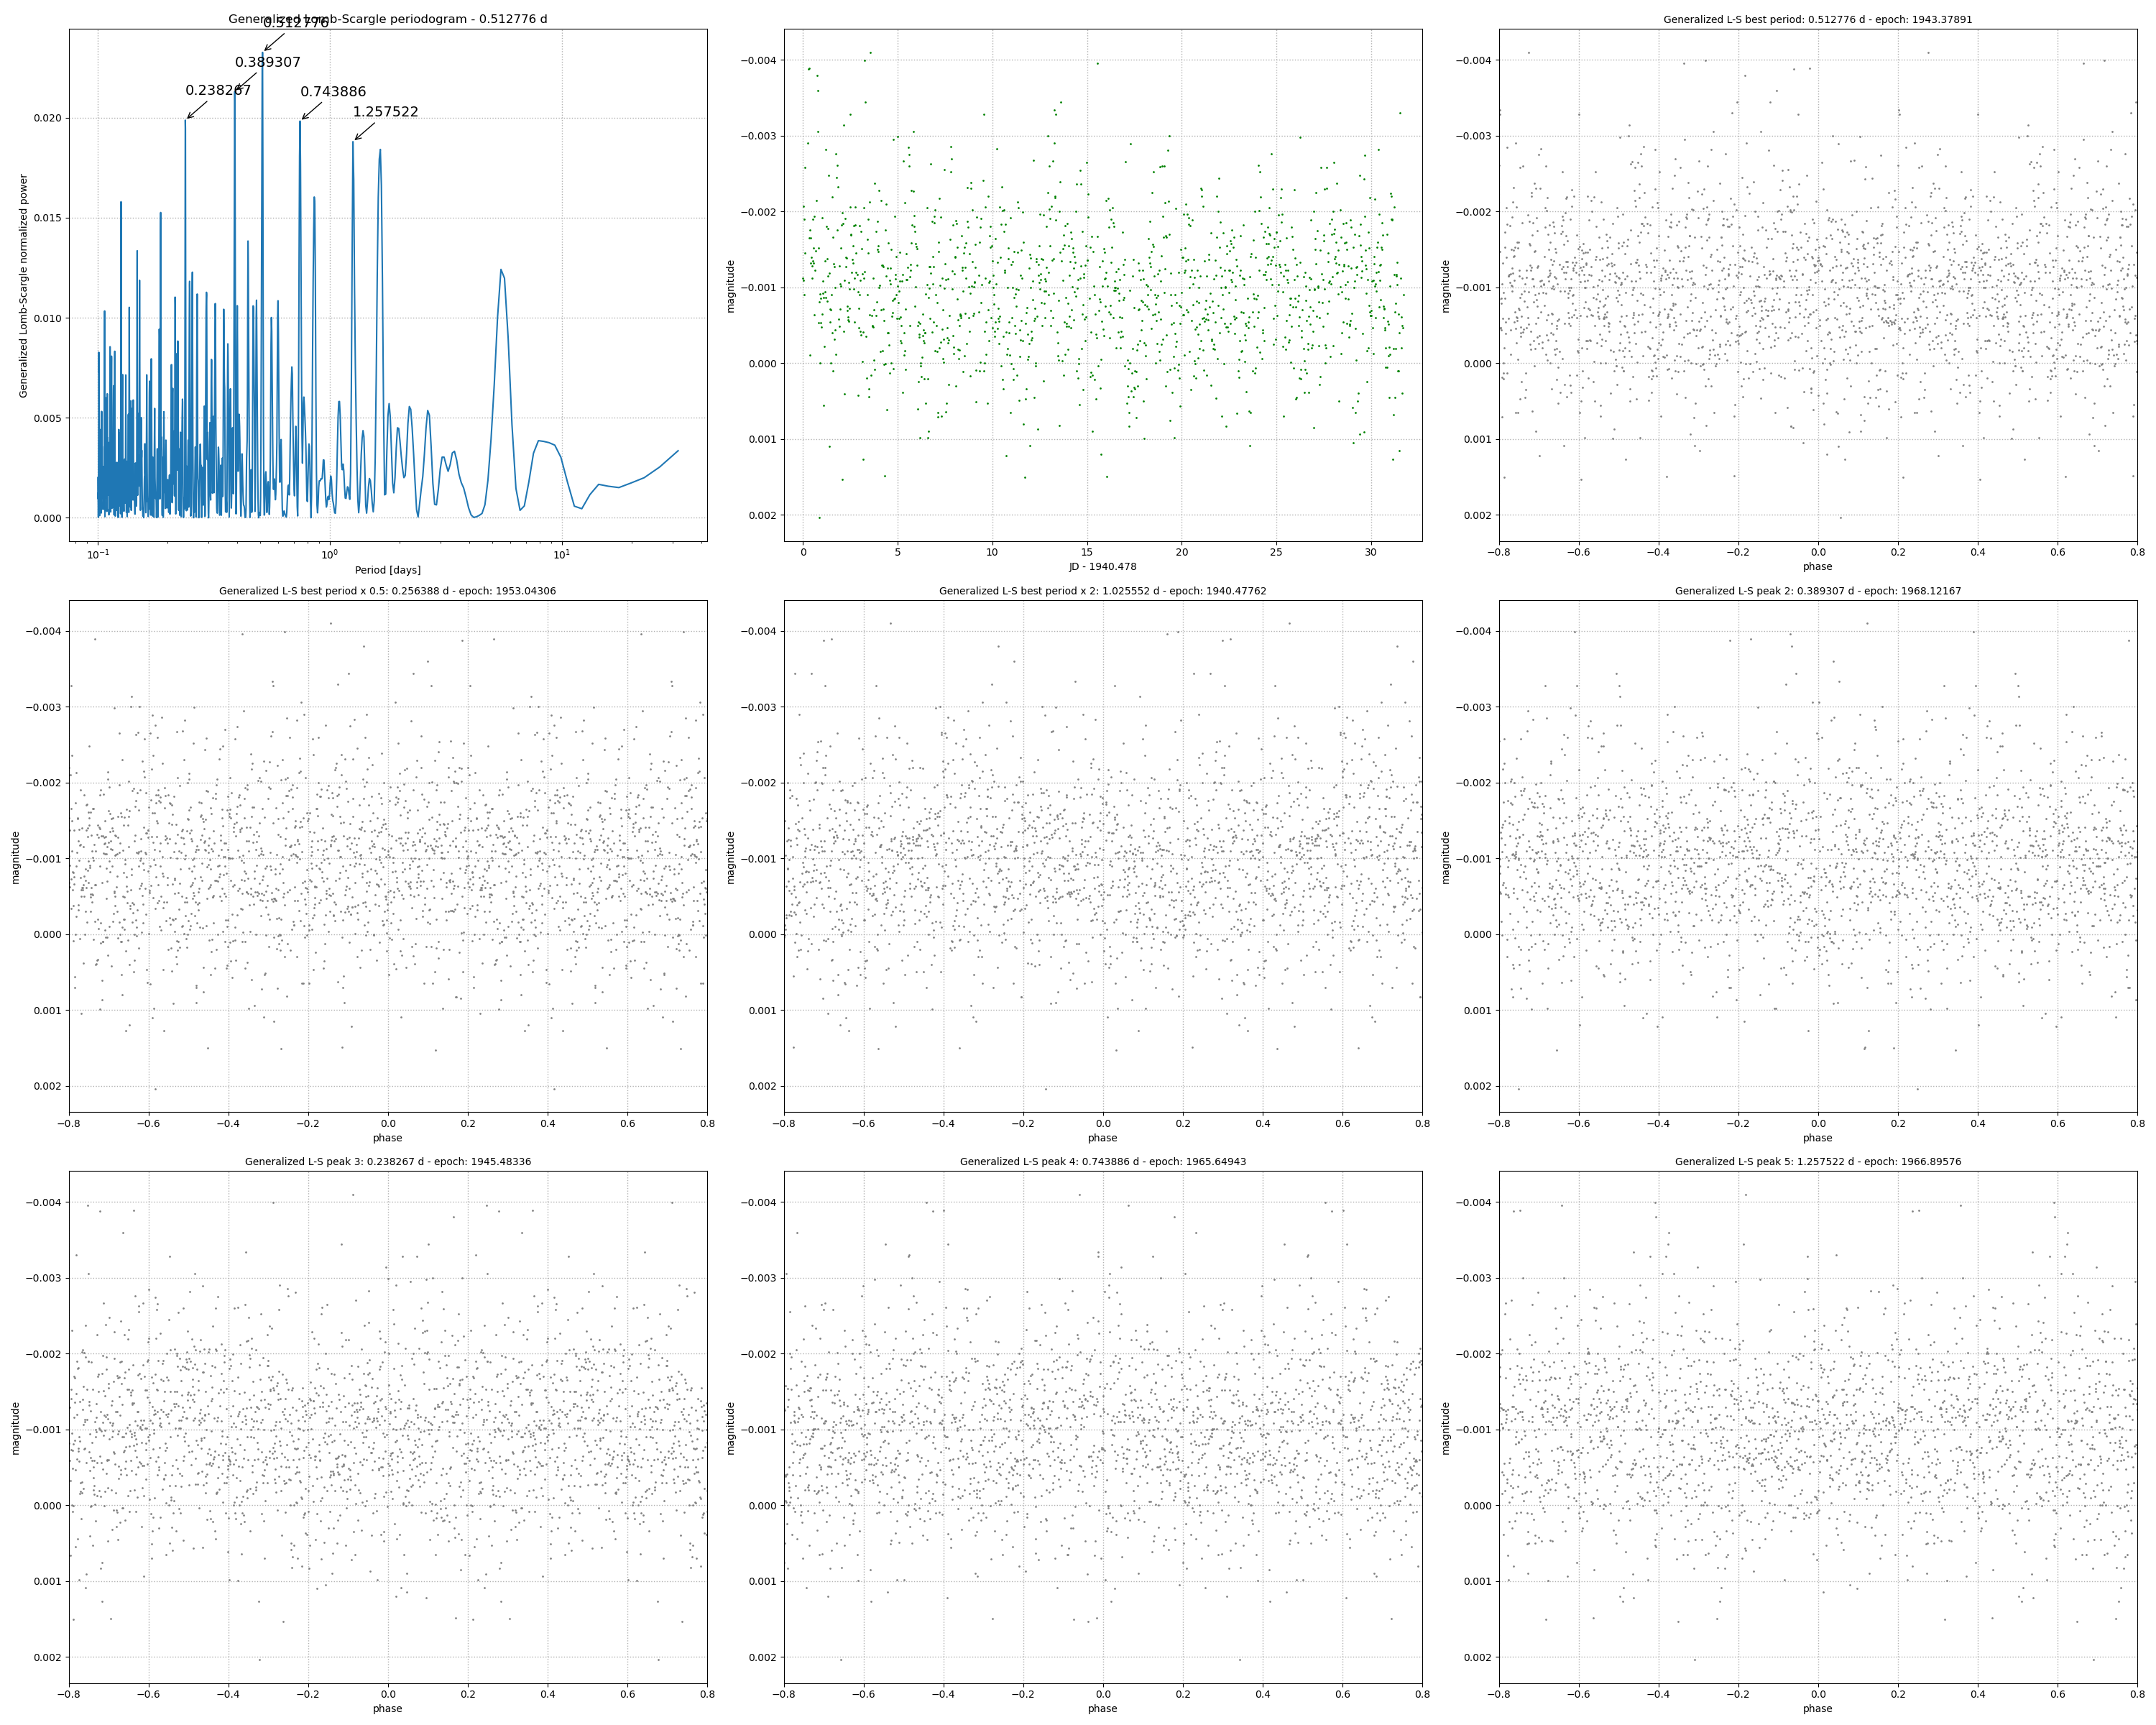

In [8]:
from IPython.display import Image
Image('0000173-checkplot-glsp.png')

In [9]:
glsp

{'bestperiod': 0.5127760056634293,
 'bestlspval': 0.023263215104405877,
 'nbestpeaks': 5,
 'nbestlspvals': [0.023263215104405877,
  0.021305132008645054,
  0.0198754120025565,
  0.01982854398344538,
  0.018801998809442173],
 'nbestperiods': [0.5127760056634293,
  0.389306598894348,
  0.23826734699248064,
  0.7438863180751156,
  1.2575221091269813],
 'lspvals': array([0.00335336, 0.00254197, 0.00200477, ..., 0.00096218, 0.00104995,
        0.00201137]),
 'omegas': array([ 0.19827305,  0.23792767,  0.27758228, ..., 62.7335946 ,
        62.77324921, 62.81290382]),
 'periods': array([31.68955715, 26.40796429, 22.63539796, ...,  0.10015663,
         0.10009336,  0.10003017]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [10]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [0.5127760056634293, 0.389306598894348, 0.23826734699248064, 0.7438863180751156, 1.2575221091269813] (days)


In [11]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs)

[I 200815 13:22:11 abls:919] min P: 0.1, max P: 100.0, nfreq: 126632, minfreq: 0.01, maxfreq: 10.0
[I 200815 13:22:11 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 7.889034195607261e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[W 200815 13:22:11 abls:964] the requested max P = 100.000 is larger than the time base of the observations = 31.690,  will make minfreq = 2 x 1/timebase
[W 200815 13:22:11 abls:969] new minfreq: 0.06311227356485809, maxfreq: 10.0
[I 200815 13:22:11 abls:980] using 6 workers...
[I 200815 13:22:11 abls:1090] worker 1: minfreq = 0.063112, nfreqs = 21105
[I 200815 13:22:11 abls:1090] worker 2: minfreq = 1.728093, nfreqs = 21105
[I 200815 13:22:11 abls:1090] worker 3: minfreq = 3.393074, nfreqs = 21105
[I 200815 13:22:11 abls:1090] worker 4: minfreq = 5.058054, nfreqs = 21105
[I 200815 13:22:11 abls:1090] worker 5: minfreq = 6.723035, nfreqs = 21105
[I 200815 13:22:11 abls:1090] worker 6: minfreq = 8.388016, nfreq

In [12]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs)

[W 200815 13:23:42 png:1142] no best period found for this object, skipping...


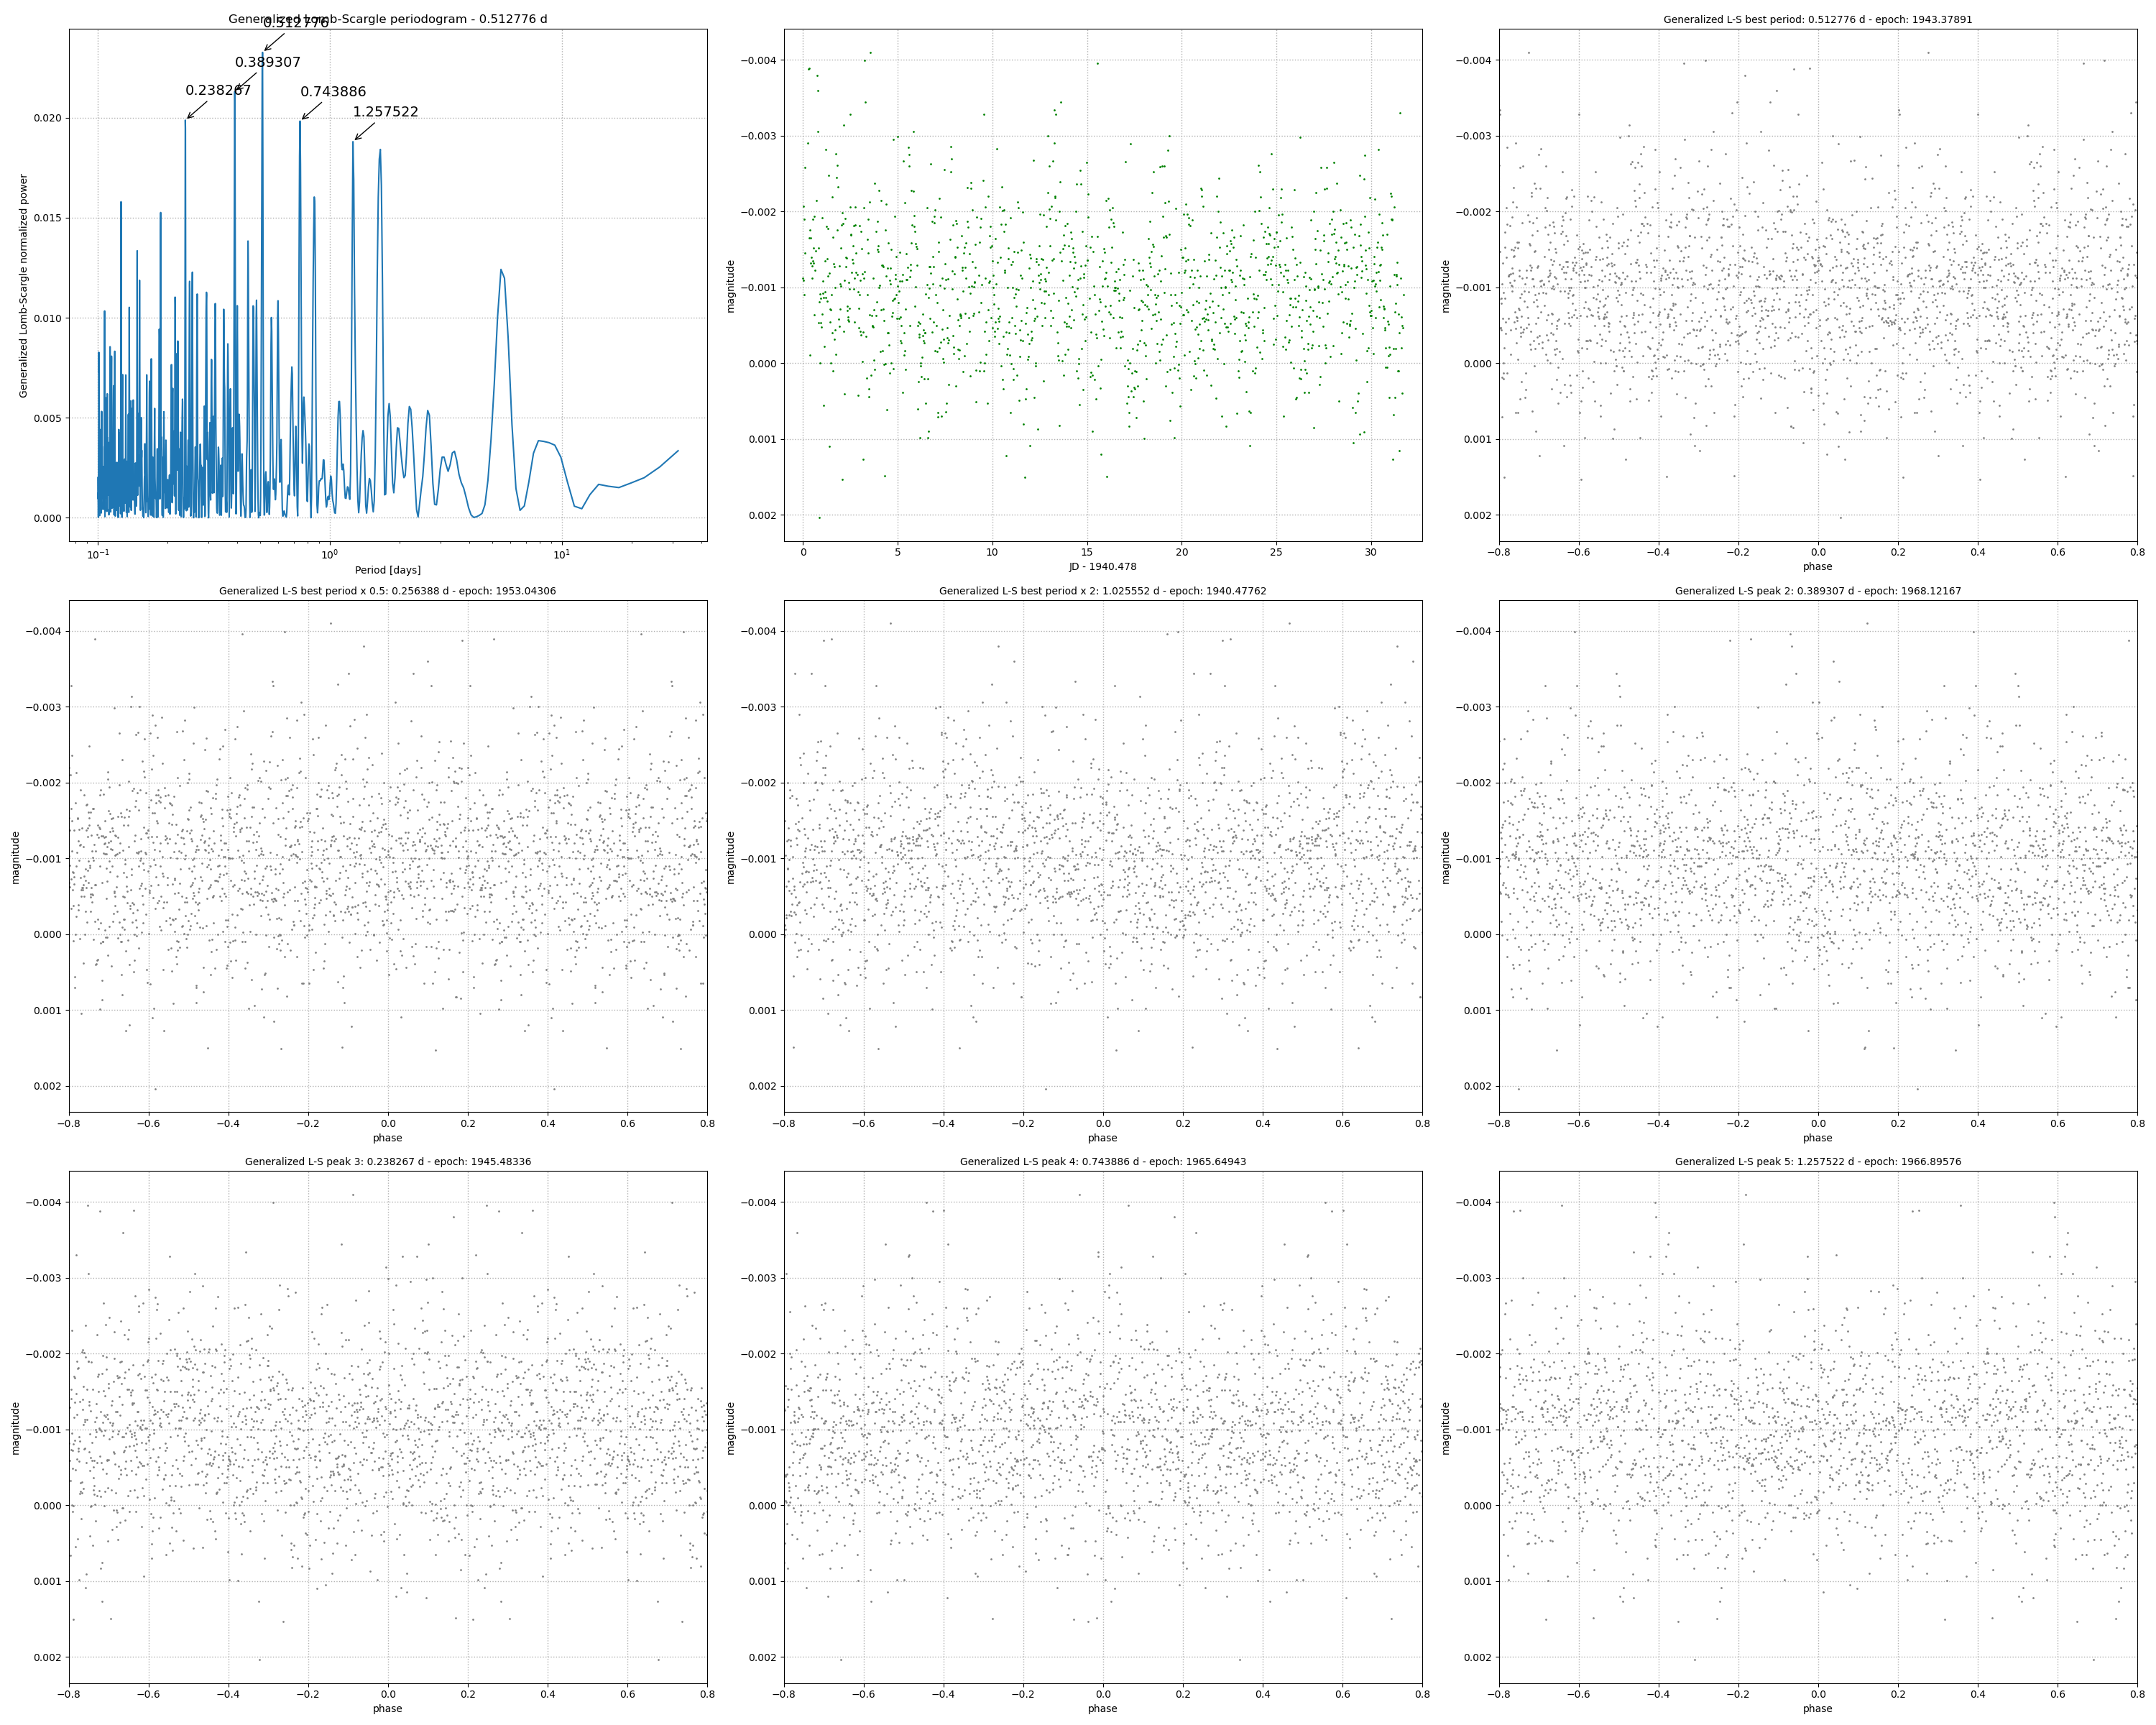

In [14]:
Image('0000173-checkplot-glsp.png')

In [15]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs)

[I 200815 13:23:59 spdm:337] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200815 13:23:59 spdm:349] using 6 workers...


In [16]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs)

[I 200815 13:24:10 nonphysical:216] spline fit done. nknots = 13,  chisq = 12826011.87738, reduced chisq = 9514.84561
[I 200815 13:24:10 png:696] plotting phased LC with period 15.844779, epoch 1956.14867
[I 200815 13:24:11 nonphysical:216] spline fit done. nknots = 13,  chisq = 12983275.39127, reduced chisq = 9631.50993
[I 200815 13:24:11 png:696] plotting phased LC with period 7.922389, epoch 1948.38465
[I 200815 13:24:11 nonphysical:216] spline fit done. nknots = 13,  chisq = 12924831.73035, reduced chisq = 9588.15410
[I 200815 13:24:11 png:696] plotting phased LC with period 31.689557, epoch 1971.84027
[I 200815 13:24:11 nonphysical:216] spline fit done. nknots = 13,  chisq = 13172079.62176, reduced chisq = 9764.32885
[I 200815 13:24:11 png:696] plotting phased LC with period 9.320458, epoch 1949.79443
[I 200815 13:24:11 nonphysical:216] spline fit done. nknots = 13,  chisq = 12924831.73035, reduced chisq = 9588.15410
[I 200815 13:24:11 png:696] plotting phased LC with period 31.68

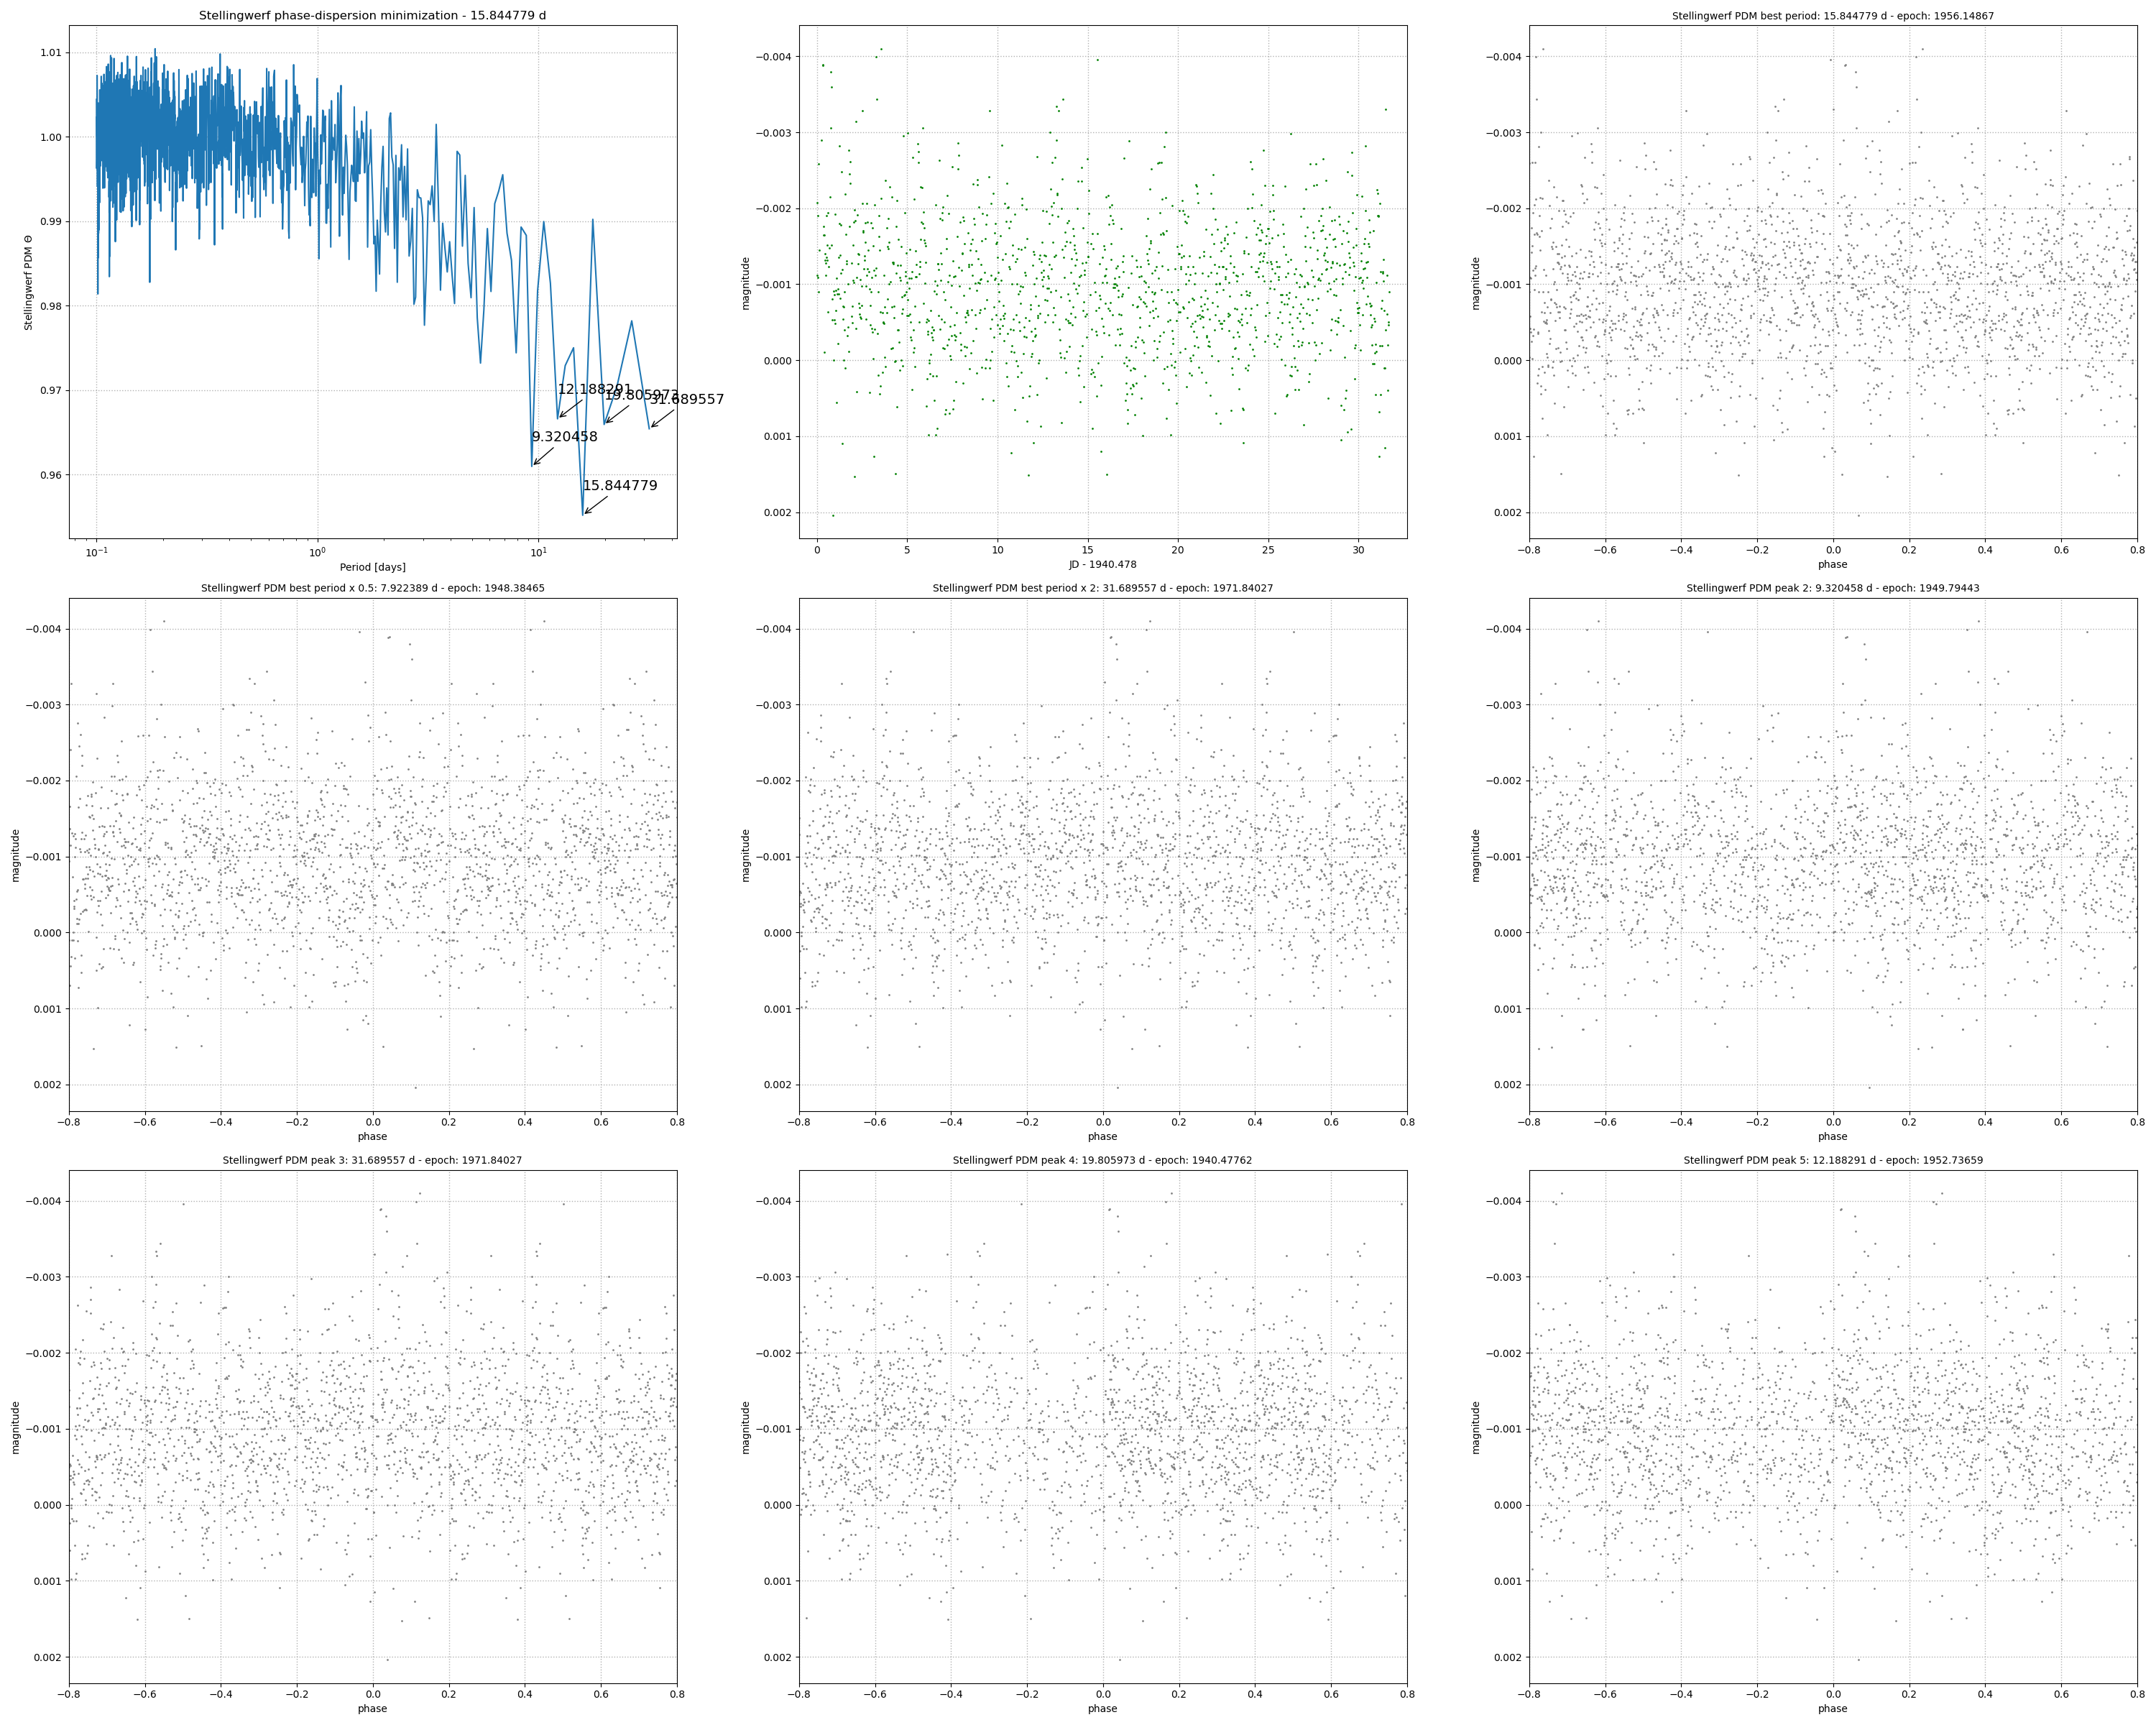

In [17]:
Image('0000173-checkplot-spdm.png')

In [18]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [15.844778574999964, 9.320457985294096, 31.689557149999928, 19.805973218749955, 12.188291211538433] (days)
